<h2><img src="../day1/coding hive logo med with text.png" height="60" width ="47"> Coding A Neural Network 3: Convolution Neural Network (CNN)</h2>

<h3>Step 1: Load the Libraries</h3>

In [1]:
import keras                                       # deep learning package
from keras.datasets import mnist                   # dataset we will use to train our model
from keras.layers import Dense                     # Dense describes how the layers are connected
from keras.models import Sequential                # Sequential means we are creating a sequence of connectec layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout   #CNN layers
from keras.optimizers import SGD                   # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt                    # visualize images
from keras.preprocessing import image              # preprocess images
import tensorflow as tf                            # another way to obtain the data if keras link is not working

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets
#(train_x, train_y) , (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz') #backup method
#train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
#test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<h3>Step 3: Reshape Data</h3>

In [3]:
train_x = train_x.reshape(60000,28,28,1)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,28,28,1)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [4]:
train_x[1].shape #view the content of one reshaped image. How is it different from before?


(28, 28, 1)

In [5]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<h3>Step 4: Define Your Model</h3>

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=(28,28,1),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(name='flatten'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [80]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

<h3>Step 5: Compile Your Model</h3>

In [82]:
model.compile(optimizer=keras.optimizers.Adadelta(),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [83]:
history=model.fit(train_x,train_y,validation_data=(test_x, test_y),epochs=3, batch_size=128,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


  128/60000 [..............................] - ETA: 4:51 - loss: 14.2475 - acc: 0.1016

  512/60000 [..............................] - ETA: 1:24 - loss: 13.7279 - acc: 0.1250

  768/60000 [..............................] - ETA: 1:03 - loss: 13.7111 - acc: 0.1302

 1152/60000 [..............................] - ETA: 46s - loss: 13.6354 - acc: 0.1389 

 1536/60000 [..............................] - ETA: 39s - loss: 13.4795 - acc: 0.1465

 1792/60000 [..............................] - ETA: 36s - loss: 13.2607 - acc: 0.1613

 2176/60000 [>.............................] - ETA: 32s - loss: 13.0387 - acc: 0.1705

 2560/60000 [>.............................] - ETA: 29s - loss: 12.8381 - acc: 0.1805

 2944/60000 [>.............................] - ETA: 27s - loss: 12.5123 - acc: 0.1990

 3456/60000 [>.............................] - ETA: 25s - loss: 12.0611 - acc: 0.2257

 3840/60000 [>.............................] - ETA: 23s - loss: 11.8716 - acc: 0.2375

 4096/60000 [=>............................] - ETA: 23s - loss: 11.7334 - acc: 0.2456

 4608/60000 [=>............................] - ETA: 21s - loss: 11.5245 - acc: 0.2587

 4992/60000 [=>............................] - ETA: 21s - loss: 11.2548 - acc: 0.2766

 5376/60000 [=>............................] - ETA: 20s - loss: 11.1187 - acc: 0.2852

 5760/60000 [=>............................] - ETA: 19s - loss: 10.9535 - acc: 0.2953

 6144/60000 [==>...........................] - ETA: 19s - loss: 10.8632 - acc: 0.3008

 6528/60000 [==>...........................] - ETA: 18s - loss: 10.7729 - acc: 0.3058

 6912/60000 [==>...........................] - ETA: 18s - loss: 10.6755 - acc: 0.3115

 7296/60000 [==>...........................] - ETA: 18s - loss: 10.5672 - acc: 0.3185

 7680/60000 [==>...........................] - ETA: 17s - loss: 10.4582 - acc: 0.3254

 8064/60000 [===>..........................] - ETA: 17s - loss: 10.3863 - acc: 0.3297

 8448/60000 [===>..........................] - ETA: 17s - loss: 10.3289 - acc: 0.3340

 8832/60000 [===>..........................] - ETA: 16s - loss: 10.2428 - acc: 0.3399

 9216/60000 [===>..........................] - ETA: 16s - loss: 10.1652 - acc: 0.3451

 9600/60000 [===>..........................] - ETA: 16s - loss: 10.0916 - acc: 0.3503

 9984/60000 [===>..........................] - ETA: 16s - loss: 10.0264 - acc: 0.3548

10368/60000 [====>.........................] - ETA: 15s - loss: 9.9943 - acc: 0.3571 

10752/60000 [====>.........................] - ETA: 15s - loss: 9.9645 - acc: 0.3592

11264/60000 [====>.........................] - ETA: 15s - loss: 9.8942 - acc: 0.3641

11520/60000 [====>.........................] - ETA: 15s - loss: 9.8485 - acc: 0.3670

11904/60000 [====>.........................] - ETA: 15s - loss: 9.8143 - acc: 0.3693

12416/60000 [=====>........................] - ETA: 14s - loss: 9.7475 - acc: 0.3740

12800/60000 [=====>........................] - ETA: 14s - loss: 9.7007 - acc: 0.3773

13184/60000 [=====>........................] - ETA: 14s - loss: 9.6633 - acc: 0.3801

13568/60000 [=====>........................] - ETA: 14s - loss: 9.6342 - acc: 0.3821

13952/60000 [=====>........................] - ETA: 13s - loss: 9.5970 - acc: 0.3847

14336/60000 [======>.......................] - ETA: 13s - loss: 9.5765 - acc: 0.3864

14720/60000 [======>.......................] - ETA: 13s - loss: 9.5592 - acc: 0.3878

14976/60000 [======>.......................] - ETA: 13s - loss: 9.5449 - acc: 0.3888

15360/60000 [======>.......................] - ETA: 13s - loss: 9.5277 - acc: 0.3900

15744/60000 [======>.......................] - ETA: 13s - loss: 9.5022 - acc: 0.3919

16128/60000 [=======>......................] - ETA: 13s - loss: 9.4753 - acc: 0.3938

16384/60000 [=======>......................] - ETA: 13s - loss: 9.4526 - acc: 0.3952

16640/60000 [=======>......................] - ETA: 13s - loss: 9.4384 - acc: 0.3962

16768/60000 [=======>......................] - ETA: 13s - loss: 9.4266 - acc: 0.3969

17024/60000 [=======>......................] - ETA: 13s - loss: 9.4156 - acc: 0.3977

17408/60000 [=======>......................] - ETA: 13s - loss: 9.3916 - acc: 0.3994

17792/60000 [=======>......................] - ETA: 12s - loss: 9.3564 - acc: 0.4016

18048/60000 [========>.....................] - ETA: 12s - loss: 9.3401 - acc: 0.4026

18432/60000 [========>.....................] - ETA: 12s - loss: 9.3365 - acc: 0.4030

18816/60000 [========>.....................] - ETA: 12s - loss: 9.3190 - acc: 0.4043

19072/60000 [========>.....................] - ETA: 12s - loss: 9.3068 - acc: 0.4050

19456/60000 [========>.....................] - ETA: 12s - loss: 9.2842 - acc: 0.4066

19840/60000 [========>.....................] - ETA: 12s - loss: 9.2788 - acc: 0.4072

20224/60000 [=========>....................] - ETA: 12s - loss: 9.2695 - acc: 0.4078

20608/60000 [=========>....................] - ETA: 11s - loss: 9.2493 - acc: 0.4094

20992/60000 [=========>....................] - ETA: 11s - loss: 9.2310 - acc: 0.4106

21376/60000 [=========>....................] - ETA: 11s - loss: 9.2217 - acc: 0.4113

21760/60000 [=========>....................] - ETA: 11s - loss: 9.2047 - acc: 0.4124

22144/60000 [==========>...................] - ETA: 11s - loss: 9.1743 - acc: 0.4140

22528/60000 [==========>...................] - ETA: 11s - loss: 9.1446 - acc: 0.4156

22912/60000 [==========>...................] - ETA: 11s - loss: 9.1043 - acc: 0.4179

23296/60000 [==========>...................] - ETA: 10s - loss: 9.0733 - acc: 0.4197

23680/60000 [==========>...................] - ETA: 10s - loss: 9.0346 - acc: 0.4221

<h3>Step 7: Save Your Model</h3>

In [44]:
model.save("mnistmodel_cnn.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights_cnn.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [84]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32,verbose=2)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                            #print the accuracy

Accuracy:  0.9509


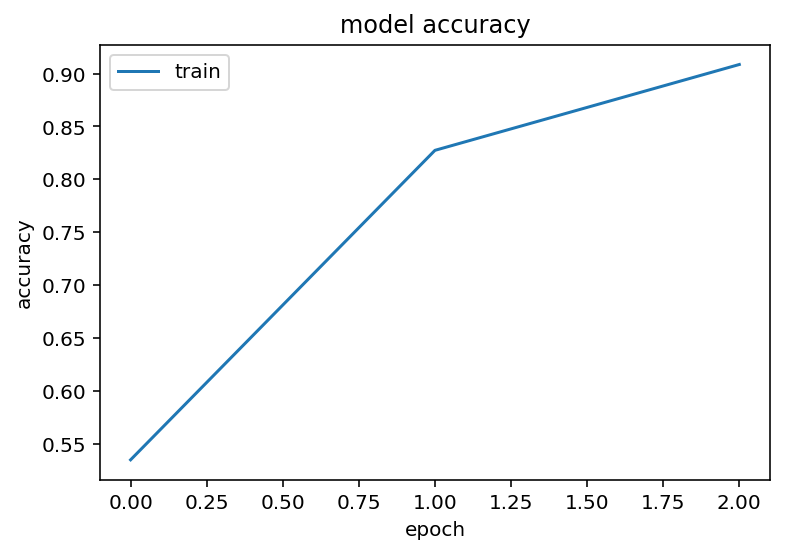

In [85]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

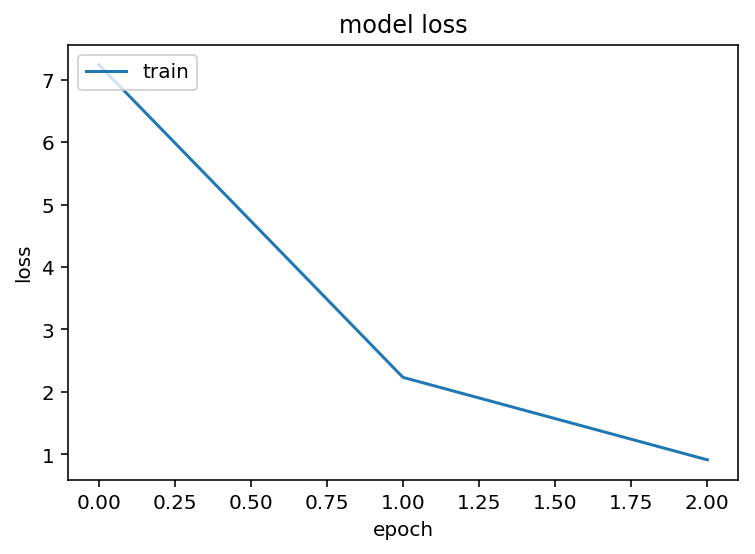

In [86]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

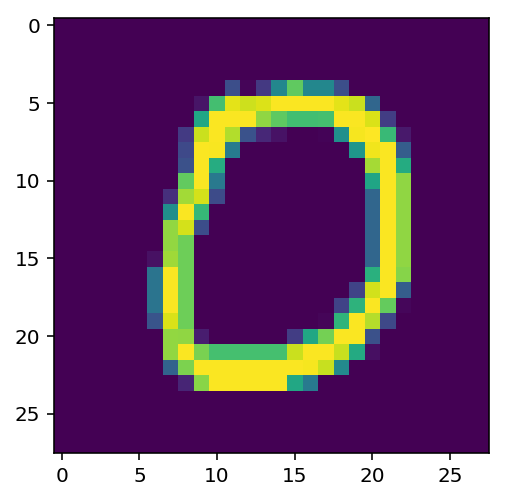

In [87]:
sample = test_x[10:11]                      #pull a case from test set
sample1 = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample1)                       #display the image


In [88]:
#sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)       #based on the pixel values, predict the number
print("Class: ",prediction)                      #print the prediction

Class:  [0]


In [89]:
#display probabilty of each possible number
(model.predict(sample))

array([[9.9998236e-01, 3.6283852e-18, 9.7115617e-07, 3.6742060e-07,
        9.0948460e-15, 1.1777180e-09, 9.9859122e-08, 7.3769671e-12,
        1.6196222e-05, 4.8365356e-10]], dtype=float32)

<h3>Assignment 2</h3>
Try different cases! Are there numbers that are harder to classify?

Try plotting accuracy and loss for all epochs

<div style="text-align: center;"><img src="../day1/coding hive logo med with text.png" height="60" width="47" />

<div> 2019